In [46]:
import pandas as pd
import numpy as np


In [47]:
# load all data
raw_data = pd.read_excel('Rain_Water_Data.xlsx', sep=';', header=0, error_bad_lines=False)

# summarize
print(raw_data.shape)
print(raw_data.head())


(59828, 8)
      ID               TIMESTAMP  TRENDFLAGS  STATUS  VALUE TRENDFLAGS_TAG  \
0  95841 2019-04-27 11:00:00.587           0       0   1840            { }   
1  95840 2019-04-27 10:45:00.090           0       0   1829            { }   
2  95839 2019-04-27 10:30:00.113           0       0   1819            { }   
3  95838 2019-04-27 10:15:00.100           0       0   1813            { }   
4  95837 2019-04-27 10:00:00.143           0       0   1813            { }   

  STATUS_TAG  ACTUALVALUE  
0       {ok}          NaN  
1       {ok}     235300.0  
2       {ok}     234300.0  
3       {ok}     233700.0  
4       {ok}     233700.0  


In [49]:
from pandas import datetime
from matplotlib import pyplot

df = pd.DataFrame(dataset,columns=['TIMESTAMP', 'ACTUALVALUE'])

#converting dataframe index to datetime index
df['TimeReviewed'] = pd.to_datetime(df['TIMESTAMP'])
df = df.set_index('TimeReviewed')
df.drop(['TIMESTAMP'], axis=1, inplace=True)
df.head()



,ACTUALVALUE
TimeReviewed,
2019-04-27 11:00:00.587,NaN
2019-04-27 10:45:00.090,235300.0
2019-04-27 10:30:00.113,234300.0
2019-04-27 10:15:00.100,233700.0
2019-04-27 10:00:00.143,233700.0


In [50]:
#created a new dataframe consisting the actual value sum of water (mL) collected per day by finding the mean of all the values for a given day.
df2 = df.resample('D').sum()

df2.head()

,ACTUALVALUE
TimeReviewed,
2017-08-05,1502800.0
2017-08-06,5548800.0
2017-08-07,5548800.0
2017-08-08,5606600.0
2017-08-09,5548800.0


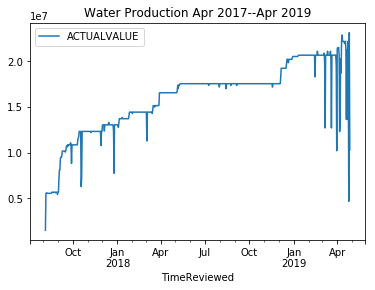

In [51]:
import matplotlib.pyplot as plt
#The data is also plotted as a time series with the month along the x-axis and amount of ml of water figures on the y-axis.
df2.plot()
plt.title('Water Production Apr 2017--Apr 2019')
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


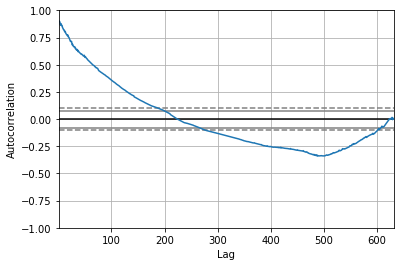

In [52]:
#ARIMA(AUTOREGRESSIVE INTEGRATED MOVING AVERAGE:used for forecasting statistical model with time series)
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
 
autocorrelation_plot(df2)#An autocorrelation plot shows the properties of a type of data known as a time series. A time series refers to observations of a single variable over a specified time horizon.
#An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. 
plt.show()

In [53]:
#use for predicting the future values
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [54]:
from statsmodels.tsa.arima_model import ARIMA
# 5,1,0 are parameters of the ARIMA Model (p=5,q=1,d=0)where p is the number of lags , q is the moving average and d is the degree of diffrentiation
model = ARIMA(df2, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.ACTUALVALUE   No. Observations:                  630
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9736.871
Method:                       css-mle   S.D. of innovations        1245975.667
Date:                Fri, 03 May 2019   AIC                          19487.742
Time:                        07:38:59   BIC                          19518.862
Sample:                    08-06-2017   HQIC                         19499.830
                         - 04-27-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.394e+04   1.63e+04      0.857      0.392   -1.79e+04    4.58e+04
ar.L1.D.ACTUALVALUE    -0.7760      0.040    -19.254      0.000      -0.855      -0.697
ar.L2.D.ACTUALVA

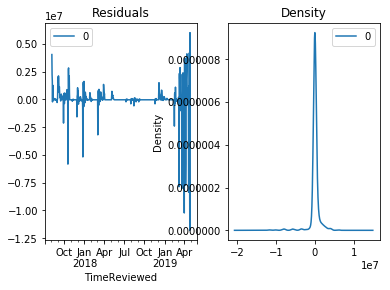

In [55]:
# Plot residual errors
#Forecast errors on a time series forecasting problem are called residual errors or residuals.
#residual error = expected - predicted
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [56]:
X = df2.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))


predicted=17635065.830312, expected=17548800.000000
predicted=17634851.913238, expected=17548800.000000
predicted=17634638.981985, expected=17548800.000000
predicted=17634427.171689, expected=17548800.000000
predicted=17634216.387682, expected=17548800.000000
predicted=17634006.693974, expected=17548800.000000
predicted=17633797.896620, expected=17548800.000000
predicted=17633590.240788, expected=17548800.000000
predicted=17633383.511536, expected=17548800.000000
predicted=17633177.807721, expected=17548800.000000
predicted=17632973.129274, expected=17548800.000000
predicted=17632769.499764, expected=17548800.000000
predicted=17632566.725585, expected=17548800.000000
predicted=17632364.915557, expected=17548800.000000
predicted=17632164.232931, expected=17548800.000000
predicted=17631964.421113, expected=17548800.000000
predicted=17631765.551080, expected=17548800.000000
predicted=17631567.688818, expected=17548800.000000
predicted=17631370.671342, expected=17548800.000000
predicted=17

predicted=20742534.445478, expected=20668800.000000
predicted=20742401.868546, expected=20668800.000000
predicted=20742269.722480, expected=20884100.000000
predicted=20876020.654490, expected=19807600.000000
predicted=20211786.446594, expected=12702700.000000
predicted=15419234.595138, expected=20668800.000000
predicted=20048734.289103, expected=20668800.000000
predicted=19157846.425979, expected=20668800.000000
predicted=19861109.780133, expected=20668800.000000
predicted=19858998.070596, expected=21099400.000000
predicted=19765977.940349, expected=20668800.000000
predicted=20782787.093951, expected=20668800.000000
predicted=20812728.651597, expected=20668800.000000
predicted=20790416.991352, expected=20668800.000000
predicted=20775593.514039, expected=20668800.000000
predicted=20801376.124101, expected=21099400.000000
predicted=20969246.891655, expected=20238200.000000
predicted=20563257.472677, expected=12702700.000000
predicted=16541652.952757, expected=20668800.000000
predicted=19

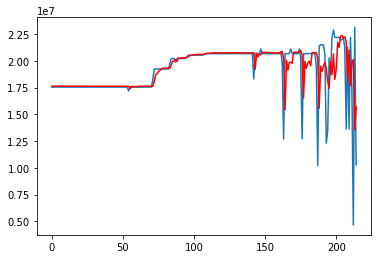

In [57]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [58]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  #Mean Absolute Percentage Error 
    me = np.mean(forecast - actual)             # Mean Error
    mae = np.mean(np.abs(forecast - actual))    # Mean Absolute Error
    mpe = np.mean((forecast - actual)/actual)   # Mean Percentage Error 
    rmse = np.mean((forecast - actual)**2)**.5  # Root Mean Squared Error
    ACCURACY = (1-mape)*100
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'ACCURACY':ACCURACY})

forecast_accuracy(yhat, obs)

{'mape': 0.5241991528186036,
 'me': 5391388.286739338,
 'mae': 5391388.286739338,
 'mpe': 0.5241991528186036,
 'rmse': 5391388.286739338,
 'ACCURACY': 47.58008471813964}

In [59]:
import pickle
with open('model.pkl', 'wb') as fid:
    pickle.dump(model, fid,2) 